In [ ]:
import numpy as np # linear algebra
import pandas as pd 

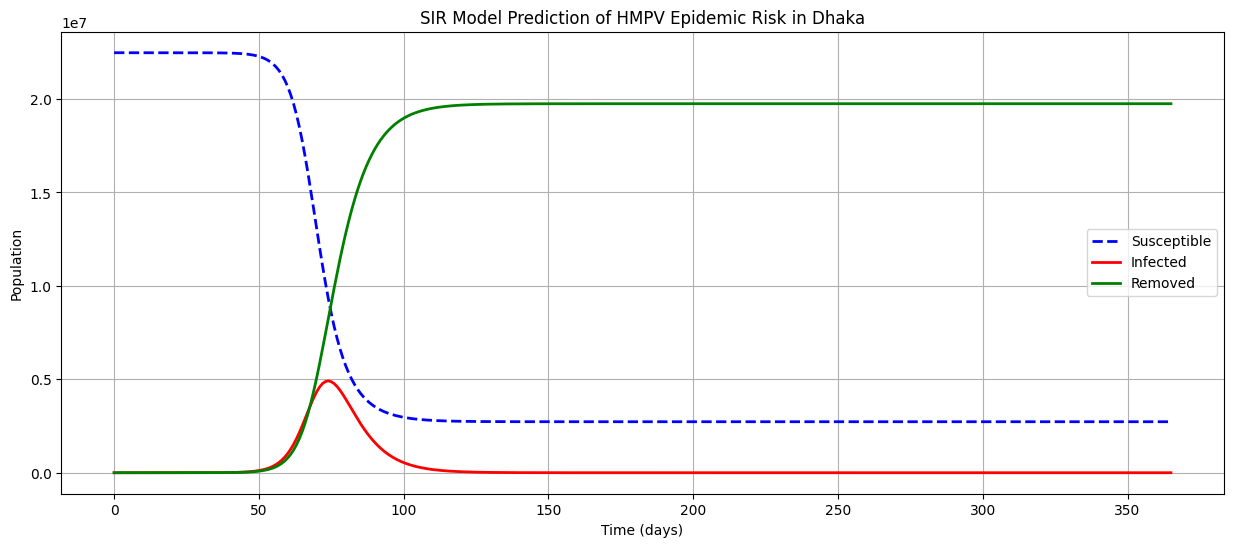

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define parameters
beta = 0.4
gamma = 1/6

# time and initial values
t = np.linspace(0, 365, 366)
initial_values = [22478115, 1, 0]
N = sum(initial_values)

# system of ode as a function
def hmpv_sir(X, t):
    S, I, R = X
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]

# solve
sol = odeint(hmpv_sir, initial_values, t)
S, I, R = sol.T

plt.figure(figsize=(15,6))
plt.plot(t, S, 'b--', label='Susceptible', linewidth=2)
plt.plot(t, I, 'r', label='Infected', linewidth=2)
plt.plot(t, R, 'g', label='Removed', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Population')   
plt.title('SIR Model Prediction of HMPV Epidemic Risk in Dhaka')
plt.grid()  
plt.legend(loc='best')
plt.show()

# Interactive

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact


# time and initial values
t = np.linspace(0, 365, 366)
initial_values = [22478115, 1, 0]
N = sum(initial_values)

# define system of ode as a function
def hmpv_sir(X, t, beta, duration):
    S, I, R = X
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - (1/duration)*I
    dRdt = (1/duration)*I
    return [dSdt, dIdt, dRdt]

def intPlot(beta, duration):
    # solve
    sol = odeint(hmpv_sir, initial_values, t, args=(beta, duration))
    S, I, R = sol.T

    plt.figure(figsize=(15,6))

    #  the peak value of I and its corresponding time
    I_peak = max(I)
    t_peak = t[np.argmax(I)]  #  the time corresponding to the max value of I


    # the peak infected point:
    plt.scatter(t_peak, I_peak, color='k', zorder=5, label=f'Peak Infected ({t_peak:.1f} days, {I_peak:.0f})')
    plt.text(t_peak, I_peak, f'({t_peak:.1f}, {I_peak:.0f})', color='black', fontsize=10, ha='left', va='bottom')
    
    
    
    plt.plot(t, S, 'b--', label='Susceptible', linewidth=2)
    plt.plot(t, I, 'r', label='Infected', linewidth=2)
    plt.plot(t, R, 'g', label='Removed', linewidth=2)
    plt.xlabel('Time (days)')
    plt.ylabel('Population')   
    plt.title('SIR Model Prediction of HMPV Epidemic Risk in Dhaka')
    plt.grid()  
    plt.legend(loc='best')
    plt.show()


interact(intPlot,
        beta=(0.05, 0.95, 0.1),
        duration=(3, 8, 1))

interactive(children=(FloatSlider(value=0.45, description='beta', max=0.95, min=0.05), IntSlider(value=5, desc…

<function __main__.intPlot(beta, duration)>